# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Functions

In [17]:
def plot_dist(dataset1, dataset2):
    # Set up the figure and axes
    fig, ax = plt.subplots(nrows=dataset1.shape[1], ncols=1, figsize=(8, 12), sharex=True)

    # Loop through each column in the datasets
    for i in range(dataset1.shape[1]):

        # Plot the KDE plot for the train data
        sns.kdeplot(dataset1.iloc[:, i], ax=ax[i], label='Train', color='blue')

        # Plot the KDE plot for the test data
        sns.kdeplot(dataset2.iloc[:, i], ax=ax[i], label='Test', color='red')

        ax[i].set(xlabel=None)
        ax[i].set(ylabel=None)
        ax[i].set_xticks([])
        ax[i].set_yticks([])

    # Show the plot
    return plt.show()

# Create Artifical Dataset

In [18]:
# Normal dataset
x, y = make_classification(
                          n_samples=1000,
                          n_features=20,
                          n_informative=15,
                          n_redundant=5,
                          random_state=1
                          )
x = pd.DataFrame(x)
#  train-test split xtrain, ytrain
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, shuffle=True, stratify=y, random_state=1)

# Dataset with data drift (dd)
x_dd, y_dd = make_classification(
                                n_samples=1000,
                                n_features=20,
                                n_informative=15,
                                n_redundant=5,
                                shift=2,
                                random_state=1
                                )
x_dd = pd.DataFrame(x_dd)

# Dataset with concept drift (cd)
# Concept drift is simulated by changing the number of informative features
x_cd, y_cd = make_classification(
                                n_samples=500,
                                n_features=20,
                                n_informative=13,
                                n_redundant=7,
                                random_state=1)
x_cd = pd.DataFrame(x_cd)

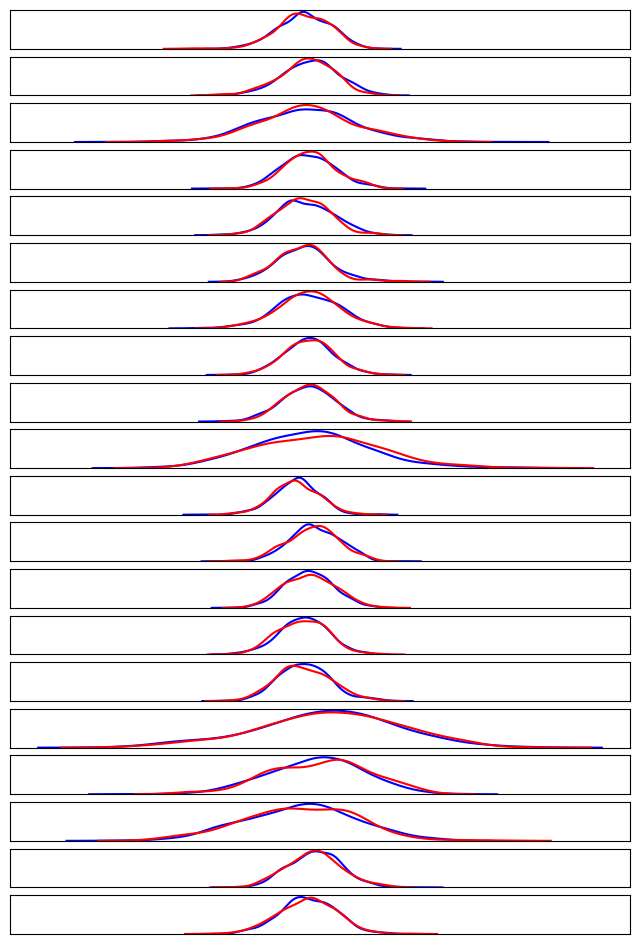

In [22]:
plot_dist(xtrain, xtest)

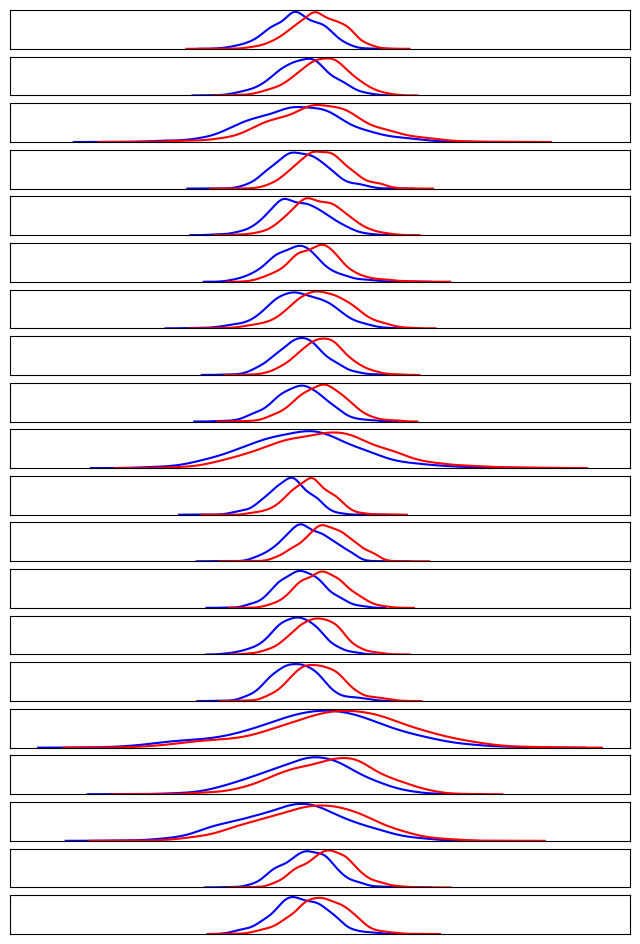

In [20]:
plot_dist(xtrain, x_dd)

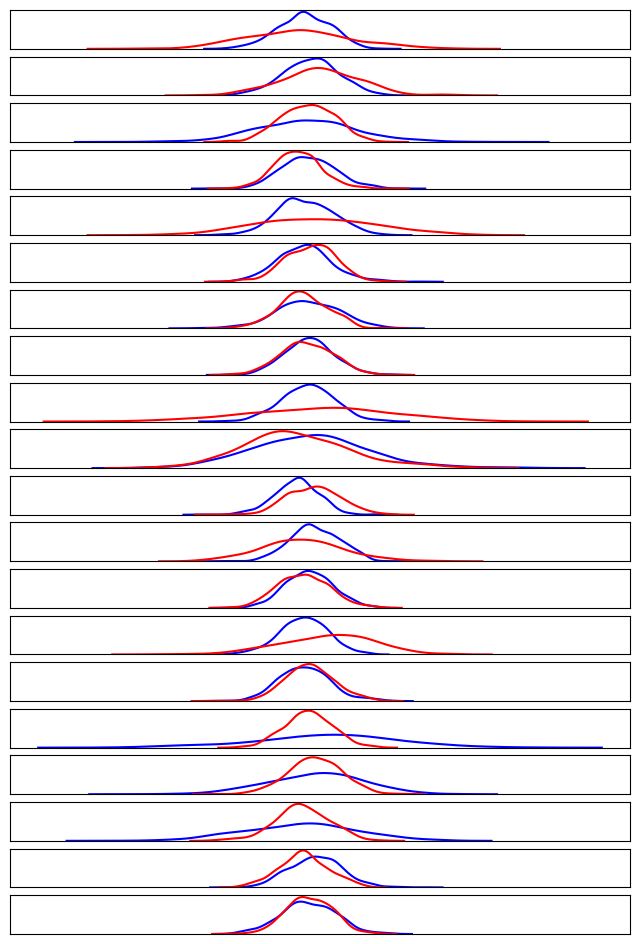

In [21]:
plot_dist(xtrain, x_cd)

# Model

In [7]:
# fit prediction model on normal dataset
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(xtrain, ytrain)
ypred = rf.predict(xtest)
print(f'Test accuracy on normal dataset: {accuracy_score(ytest, ypred)}')

Test accuracy on normal dataset: 0.9333333333333333


In [8]:
# predict on dataset with data drift
ypred = rf.predict(x_dd)
print(f'Test accuracy on data drift dataset: {accuracy_score(y_dd, ypred)}')

Test accuracy on data drift dataset: 0.783


In [9]:
# predict on dataset with concept drift
ypred = rf.predict(x_cd)
print(f'Test accuracy on concept drift dataset: {accuracy_score(y_cd, ypred)}')

Test accuracy on concept drift dataset: 0.402
